In [1]:
from interaction_inference import simulation
from interaction_inference import correlation
from interaction_inference import optimization
from interaction_inference import dataset
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import pandas as pd
import tqdm

In [2]:
rng = np.random.default_rng()

In [16]:
g = 0.5
r = 5
params = {
    'k_on_1': g,
    'k_on_2': g,
    'k_off_1': 1 - g,
    'k_off_2': 1 - g,
    'k_tx_1': r,
    'k_tx_2': r,
    'k_deg_1': 1,
    'k_deg_2': 1,
    'k_reg': 0
}
sample = simulation.gillespie_telegraph(params, 10000)

In [17]:
x1_sample = [x[0] for x in sample]
x2_sample = [x[1] for x in sample]
print(f"x1 mean: {np.mean(x1_sample)}, x1 var: {np.std(x1_sample)**2}")
print(f"x2 mean: {np.mean(x2_sample)}, x2 var: {np.std(x2_sample)**2}")

x1 mean: 2.4592, x1 var: 5.452135359999999
x2 mean: 2.5061, x2 var: 5.644162789999998


In [19]:
# create dataset
params_df = pd.DataFrame(index=[f"Gene-pair-{0}"], columns=['k_on_1', 'k_on_2', 'k_off_1', 'k_off_2', 'k_tx_1', 'k_tx_2', 'k_deg_1', 'k_deg_2', 'k_reg'])
params_df.iloc[0] = [params['k_on_1'], params['k_on_2'], params['k_off_1'], params['k_off_2'], params['k_tx_1'], params['k_tx_2'], params['k_deg_1'], params['k_deg_2'], params['k_reg']]
counts_df = pd.DataFrame(index=[f"Gene-pair-{0}"], columns=[f"Cell-{j}" for j in range(10000)])
counts_df.iloc[0] = sample

data = dataset.Dataset("data")
data.count_dataset = counts_df
data.param_dataset = params_df
data.cells = 10000
data.gene_pairs = 1
data.beta = np.array([1.0 for j in range(10000)])

In [20]:
data.compute_moments()

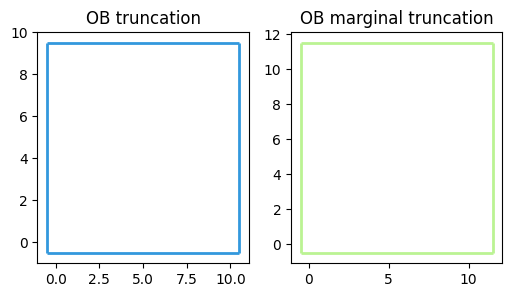

In [30]:
data.compute_probabilities(display=True)

In [41]:
momt_BD = optimization.Optimization(
    data,
    ["probability", "marginal_CME", "base"],
    license_file="C:/WLS_credentials.json",
    tqdm_disable=False,
    print_solution=True
)

100%|██████████| 1/1 [00:00<00:00,  3.94it/s]

Optimization status: INFEASIBLE
Runtime: 0.07200002670288086
